#**Unsupervised Learning- K Means clustering**
K-mean clustering is a type of unsupervised learning, which is used when you have unlabled data. The objective of this algorithm is to identify clusters in the data, with each cluster represented by the variable.
 
#**Problem Statement:**
**Task**: From the given Iris Dataset, we will predict the optimum number of clusters using the 'elbow method'.

#**Dataset**
(IRIS dataset)
https://drive.google.com/file/d/1UH-2IlbxIogzhh-hAS4e3gmiKKcSVzC1/view?usp=sharing 

The columns in this dataset are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sb

##Connecting to drive

In [ ]:
!pwd
from google.colab import drive
from os.path import join
ROOT="/content/drive"
print(ROOT)
drive.mount('/content/drive/')

/content/drive/My Drive
/content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#%ls
#%pwd

%cd 'drive/My Drive/'

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


## Importing data

In [ ]:
raw_data=pd.read_csv('Iris.csv')
# Displaying the whole dataset
print(raw_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
#View the information of dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
raw_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
raw_data.shape

(150, 6)

In [ ]:
#Print the structure of the data
raw_data.apply(lambda x: [x.unique()])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...","[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...","[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...","[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...","[Iris-setosa, Iris-versicolor, Iris-virginica]"


In [ ]:
#Drop Id and Species column
raw_data_new=raw_data.copy()
raw_data_new.drop(['Id','Species'],axis=1,inplace=True)
raw_data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Statistical information of data
raw_data_new.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Correlation
raw_data_new.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


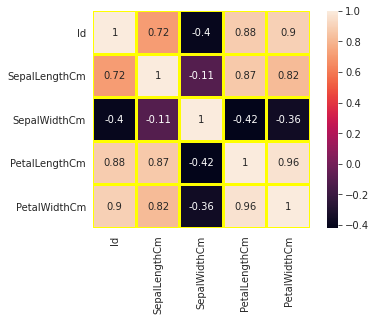

In [ ]:
#heatmap
sb.heatmap(raw_data.corr(), annot=True,linecolor='yellow',linewidths=2,square=True)

## Finding optimum number of clusters

In [ ]:
x = df_new.iloc[:, [0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. 

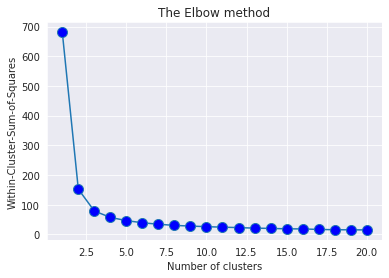

In [ ]:
wcss= []
for i in range (1,21):
    model=KMeans(i)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,21), wcss, marker='.',markersize=20,markerfacecolor='b')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

In [ ]:
#Finding optimum value of K with elbow method
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11):
    k_mod1=KMeans(n_clusters=i)
    k_mod1.fit(df_new.iloc[:,:-1])
    sse.append(k_mod1.inertia_)
sse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.34492380952382,
 46.53558205128205,
 38.930963049671746,
 34.198464618714624,
 30.227724598930486,
 28.207705588271384,
 26.422543983793986]

Text(0.5, 1.0, 'The Elbow Method')

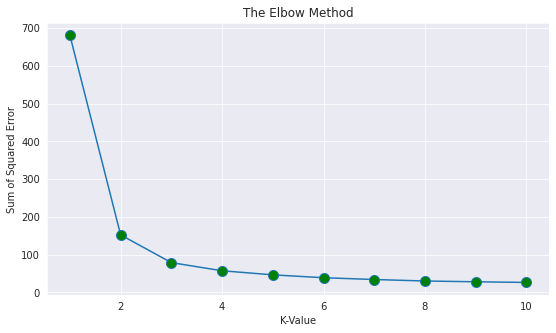

In [ ]:
# Plotting the results onto a line graph to observe elbow method
sb.set_style('darkgrid')
plt.figure(figsize=(9,5))
plt.plot(range(1,11),sse,marker='.',markersize=20,markerfacecolor='g')
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Error')
plt.title('The Elbow Method')

In [ ]:
#Above,  we could see that K=3 is a more suitable value to proceed further.
raw_data_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Model fitting 
k_mod2=KMeans(n_clusters=3,random_state=0)
pred1=k_mod2.fit_predict(raw_data_new)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Every id is assigned to each cluster, i.e. id=1 to cluster 1, id=2 to cluster 2 and id=3 to cluster 3

In [ ]:
#Create new column "Cluster" and assign prediction 0,1,2
raw_data_new['Cluster']= pred1
raw_data_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


## Visualizing the clusters

##As per species

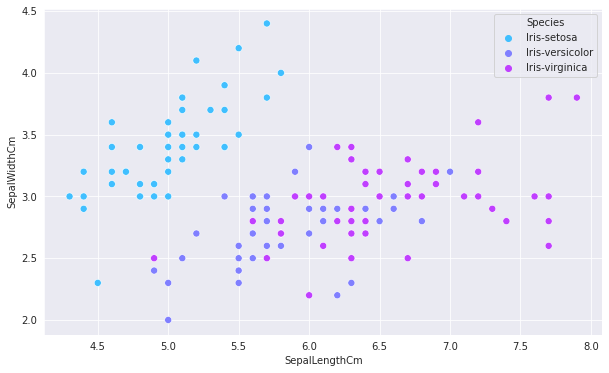

In [ ]:
plt.figure(figsize=(10,6))
sb.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df, s= 50,hue='Species',palette='cool')

## As per clusters

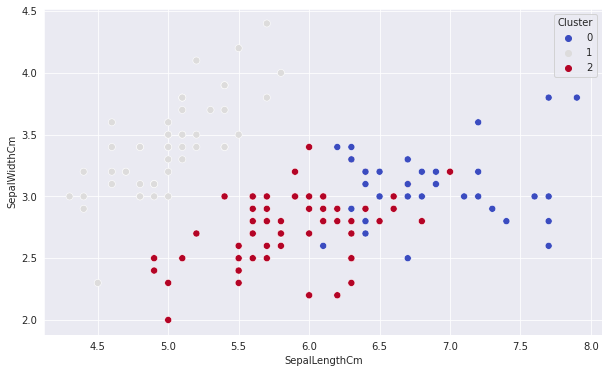

In [ ]:
plt.figure(figsize=(10,6))
sb.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=raw_data_new, s=50, hue='Cluster',palette='coolwarm')

##Marking the centroid of each cluster formed by k-Means 

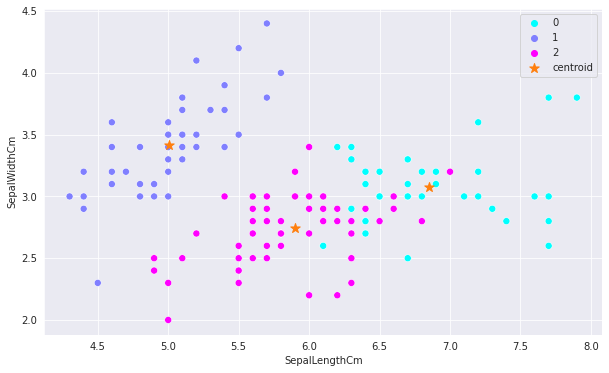

In [ ]:
plt.figure(figsize=(10,6))
sb.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=raw_data_new, s=50, hue='Cluster',palette='cool')

#Centroid of the clusters
plt.scatter(k_mod2.cluster_centers_[:,0],k_mod2.cluster_centers_[:,1],marker='*',s=100,label='centroid')
plt.legend()

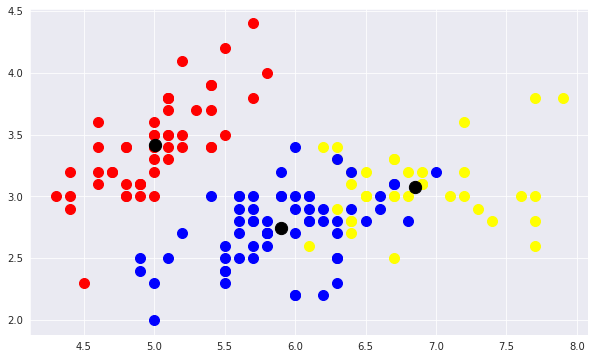

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(raw_data_new[df_new['Cluster'] == 0].iloc[:,0], raw_data_new[df_new['Cluster'] == 0].iloc[:,1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(raw_data_new[df_new['Cluster'] == 1].iloc[:,0], raw_data_new[df_new['Cluster'] == 1].iloc[:,1], 
            s = 100, c = 'red', label = 'Iris-versicolor')
plt.scatter(raw_data_new[df_new['Cluster'] == 2].iloc[:,0], raw_data_new[df_new['Cluster'] == 2].iloc[:,1], 
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_mod2.cluster_centers_[:, 0], k_mod2.cluster_centers_[:,1],
            s = 150, c = 'black', label = 'Centroids')
